In [62]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
# Initialize faker and set seed for reproducibility
fake = Faker()
Faker.seed(0)
# Generate synthetic data
data_size = 100
X = np.array([fake.random_number(digits=5) for _ in range(data_size)]).reshape(-1, 1)
# Generate a polynomial relationship with some noise
Y = 2 + 3 * X + 4 * X**2 + np.random.normal(scale=1e10, size=X.shape)
# Convert to DataFrame for better visualization
data = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})


In [64]:
print(data.head())

       X             Y
0  50494 -6.808388e+09
1  99346 -1.934550e+10
2  55125  5.829028e+09
3   5306 -4.745701e+09
4  33936  1.536798e+10


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



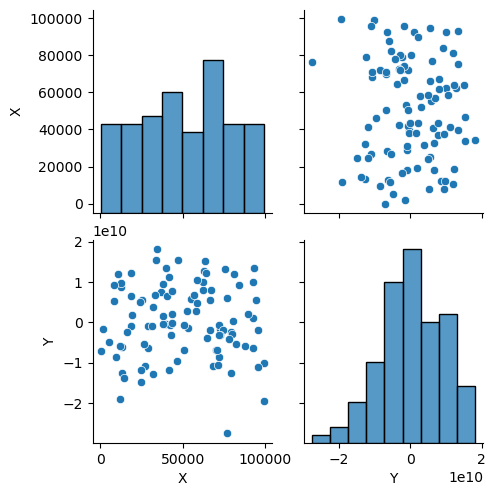

In [73]:
sns.pairplot(data=data)

In [65]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [66]:
# Create polynomial features
degree = 2 # Change the degree to fit different polynomial degrees
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

In [67]:
# Train the model
model = LinearRegression()
model.fit(X_train_poly, Y_train)


LinearRegression()

In [68]:
# Predict using the model
X_test_poly = poly_features.transform(X_test)
Y_pred = model.predict(X_test_poly)

In [69]:
 #Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.026112466878772e+19


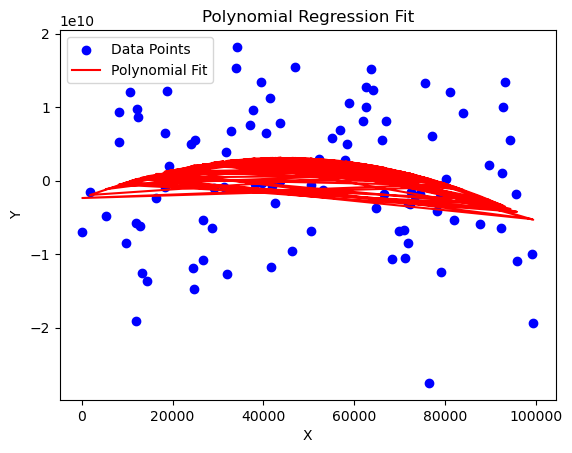

In [71]:
#Visualize the polynomial fit
plt.scatter(X, Y, color='blue', label='Data Points')
X_poly = poly_features.transform(X)
Y_poly_pred = model.predict(X_poly)
plt.plot(X, Y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.show()